### Startup Profit Predictor 


This Project is using "50-Startups dataset" to predict profits based on: 
- R&D Spend
- Admin
- Marketing Spend

using *Multiple linear regression* 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('startup.csv')

##### EDA

In [80]:
# preview data
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [68]:
# Check data types and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [69]:
# Descriptive statistics
df.describe()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,192261.930000


##### feature selection

In [ ]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

##### training the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### make predictions

In [73]:
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score
print("r2 score: ", r2_score(y_test, y_pred))

r2 score:  0.9794909902425316


##### actual vs predicted plot

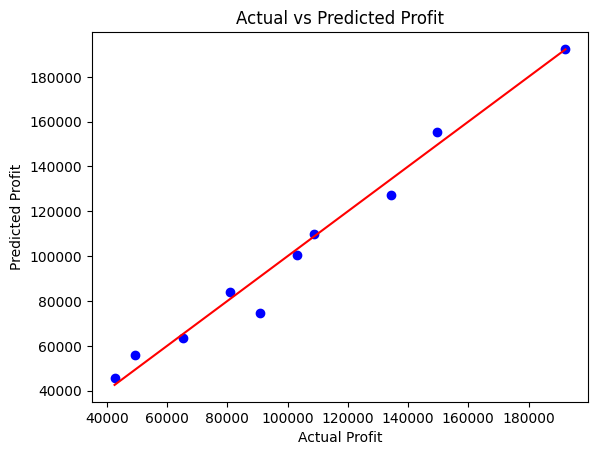

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.show()

In [77]:
print("intercept:", lr.intercept_)
print("coefficients:", lr.coef_)

# model formula used: 
print(f"model formula: Profit = {lr.intercept_:.2f} + {lr.coef_[0]:.2f}*R&D + {lr.coef_[1]:.2f}*Admin + {lr.coef_[2]:.2f}*Marketing")


intercept: 51850.031929066
coefficients: [ 0.81060992 -0.04478895  0.02690299]
model formula: Profit = 51850.03 + 0.81*R&D + -0.04*Admin + 0.03*Marketing
